<a href="https://colab.research.google.com/github/bhargav779/state-of-charge-estimation-/blob/main/soc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cp Battery_Data

cp: missing destination file operand after 'Battery_Data'
Try 'cp --help' for more information.


In [ ]:

from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
  
if 'COLAB_TPU_ADDR' not in os.environ:
  print('Not connected to TPU')
else:
  print("Connected to TPU")

Connected to TPU


In [ ]:
from sklearn import preprocessing
from google.colab import files
from itertools import cycle
from matplotlib import axis
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np 
import xgboost as xg
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy import integrate
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df5DST = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='FUDS')
df5DST.insert(5,'temp',5)
df5DST['Current']=df5DST['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df5DST['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df5DST['sum_current']=sum_current
dfN5DST = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='FUDS')
dfN5DST.insert(5,'temp',-5)
dfN5DST['Current']=dfN5DST['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(dfN5DST['Current']))
sum_current=sum_current.fillna(sum_current.mean())
dfN5DST['sum_current']=sum_current
df45DST=pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='FUDS')
df45DST.insert(5,'temp',45)
df45DST['Current']=df45DST['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df45DST['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df45DST['sum_current']=sum_current
df30DST=pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='FUDS')
df30DST.insert(5,'temp',30)
df30DST['Current']=df30DST['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df30DST['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df30DST['sum_current']=sum_current
train=pd.concat([df5DST,dfN5DST,df45DST,df30DST],axis=0)
train['sum_current']=train['sum_current'].fillna(train['sum_current'].mean())
#train
#df5FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='DST')
#df5FUDS.insert(5,'temp',5)
#df5FUDS['Current']=df5FUDS['Current'].div(1000).round(4)
#sum_current = pd.DataFrame(integrate.cumtrapz(df5FUDS['Current']))
#sum_current=sum_current.fillna(sum_current.mean())
#df5FUDS['sum_current']=sum_current
#dfN5FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='DST')
#dfN5FUDS.insert(5,'temp',-5)
#dfN5FUDS['Current']=dfN5FUDS['Current'].div(1000).round(4)
#sum_current = pd.DataFrame(integrate.cumtrapz(dfN5FUDS['Current']))
#sum_current=sum_current.fillna(sum_current.mean())
#dfN5FUDS['sum_current']=sum_current
#df45FUDS =pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='DST')
#df45FUDS.insert(5,'temp',45)
#df45FUDS['Current'] =df45FUDS['Current'].div(1000).round(4)
#sum_current = pd.DataFrame(integrate.cumtrapz(df45FUDS['Current']))
#sum_current=sum_current.fillna(sum_current.mean())
#df45FUDS['sum_current']=sum_current
#df30FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='DST')
#df30FUDS.insert(5,'temp',30)
#df30FUDS['Current']=df30FUDS['Current'].div(1000).round(4)
#sum_current = pd.DataFrame(integrate.cumtrapz(df30FUDS['Current']))
#sum_current=sum_current.fillna(sum_current.mean())
#df30FUDS['sum_current']=sum_current
#test = pd.concat([df5FUDS,dfN5FUDS,df45FUDS,df30FUDS],axis=0)
#test['sum_current']=test['sum_current'].fillna(test['sum_current'].mean())
#test
x_train,y_train=train.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1).drop('SoE',axis=1).drop('sum_current',axis=1),train['SoC']
#x_test,y_test=test.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1).drop('SoE',axis=1).drop('sum_current',axis=1),test['SoC']
#x_train=x_train.fillna(x_train.mean())
#x_test=x_test.fillna(x_test.mean())
#train_max_scaled = train['sum_current']/train['sum_current'].abs().max()
#train_min_scaled = train['sum_current']/train['sum_current'].abs().min()
#test_max_scaled = test['sum_current']/test['sum_current'].abs().max()
#test_min_scaled = test['sum_current']/test['sum_current'].abs().min()
#train_min_max=(train['sum_current'] - train['sum_current'].min()) / (train['sum_current'].max() - train['sum_current'].min())
#test_min_max=(test['sum_current'] - test['sum_current'].min()) / (test['sum_current'].max() - test['sum_current'].min())      
  
#soe=100-Energy





#median_voltage = math.floor(.voltage.median())
#median_voltage







In [ ]:
df5FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='DST')
df5FUDS.insert(5,'temp',5)
df5FUDS['Current']=df5FUDS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df5FUDS['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df5FUDS['sum_current']=sum_current
dfN5FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='DST')
dfN5FUDS.insert(5,'temp',-5)
dfN5FUDS['Current']=dfN5FUDS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(dfN5FUDS['Current']))
sum_current=sum_current.fillna(sum_current.mean())
dfN5FUDS['sum_current']=sum_current
df45FUDS =pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='DST')
df45FUDS.insert(5,'temp',45)
df45FUDS['Current'] =df45FUDS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df45FUDS['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df45FUDS['sum_current']=sum_current
df30FUDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='DST')
df30FUDS.insert(5,'temp',30)
df30FUDS['Current']=df30FUDS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df30FUDS['Current']))
sum_current=sum_current.fillna(sum_current.mean())
df30FUDS['sum_current']=sum_current
test = pd.concat([df5FUDS,dfN5FUDS,df45FUDS,df30FUDS],axis=0)
test['sum_current']=test['sum_current'].fillna(test['sum_current'].mean())
x_test,y_test=test.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1).drop('SoE',axis=1).drop('sum_current',axis=1),test['SoC']
#x_test=x_test.fillna(x_test.mean())

In [ ]:
y_test

0        100.000000
1        100.000000
2        100.000000
3        100.000000
4        100.000000
            ...    
24482      0.872584
24483      0.851126
24484      0.829970
24485      0.809101
24486      0.788271
Name: SoE, Length: 88810, dtype: float64

In [ ]:

#regr=ElasticNet(alpha=1)
#regr.fit(x_train,y_train)
#pred=regr.predict(x_test)
model =make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = 0.1, normalize = True, tol = 0.001, \
             solver ='auto', random_state = 42))
model.fit(x_train,y_train)
pred=model.predict(x_test)
#poly = PolynomialFeatures(degree = 4)
#x_train = poly.fit_transform(x_train)
 
#poly.fit(x_train, y_train)
#regr = LinearRegression()
#regr.fit(x_train, y_train)
#pred=regr.predict(x_test)
#regr=LinearRegression()
#regr.fit(x_train,y_train)
#pred=regr.predict(x_test)
#regr=SVR(kernel='linear')
#regr.fit(x_train,y_train)
#pred=regr.predict(x_test)
#sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
#sel.fit(x_train, y_train)
#sel.get_support()
#selected_feat= x_train.columns[(sel.get_support())]
#len(selected_feat)
#print(selected_feat)
#gini=RandomForestRegressor(n_estimators=1000,max_features = 'log2', max_depth=1024,criterion='squared_error',min_samples_leaf=4,random_state=1000)
#gini.fit(x_train,y_train)
#pred=gini.predict(x_test)
#mr=BayesianRidge()
#mr.fit(x_train,y_train)
#pred=mr.predict(x_test)
#pr=PoissonRegressor()
#pr.fit(x_train,y_train)
#pred=pr.predict(x_test)
#knn=KNeighborsRegressor(n_neighbors=8)
#knn.fit(x_train,y_train)
#pred=knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
y_test =np.array(y_test)
y_test


array([100.        , 100.        , 100.        , ...,  17.78419935,
        17.75968954,  17.73517974])

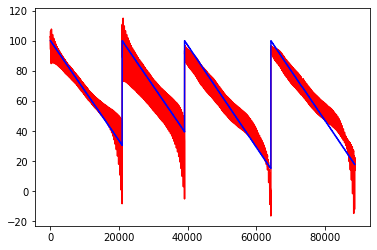

In [ ]:
from_num =None
to_num =None


plt.plot(pred[from_num:to_num],'r')
plt.plot(y_test[from_num:to_num],'b')
plt.show() 

In [ ]:
print(mean_absolute_error(pred,y_test)*100)

print(mean_squared_error(pred,y_test)*100)

468.1966472722628
3613.9309148736947


In [ ]:
df5WLTS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='WLTS')
df5WLTS.insert(5,'temp',5)
df5WLTS['Current']=df5WLTS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df5WLTS['Current']))
df5WLTS['sum_current']=sum_current
dfN5WLTS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='WLTS')
dfN5WLTS.insert(5,'temp',-5)
dfN5WLTS['Current']=dfN5WLTS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(dfN5WLTS['Current']))
dfN5WLTS['sum_current']=sum_current
df45WLTS =pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='WLTS')
df45WLTS.insert(5,'temp',45)
df45WLTS['Current']=df45WLTS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df45WLTS['Current']))
df45WLTS['sum_current']=sum_current
df30WLTS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='WLTS')
df30WLTS.insert(5,'temp',30)
df30WLTS['Current']=df30WLTS['Current'].div(1000).round(4)
sum_current = pd.DataFrame(integrate.cumtrapz(df30WLTS['Current']))
df30WLTS['sum_current']=sum_current
power = pd.concat([df5WLTS,dfN5WLTS,df45WLTS,df30WLTS],axis=0)
power['sum_current']=power['sum_current'].fillna(power['sum_current'].mean())
x_test,y_test=power.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1).drop('SoE',axis=1).drop('sum_current',axis=1),power['SoC']
#power_min_max=(power['sum_current'] - power['sum_current'].min()) / (power['sum_current'].max() - power['sum_current'].min())
#x_test=x_test.fillna(x_test.mean())
#power_min_max
#pred = xgb_r.predict(x_test)
#x_test=poly.fit_transform(x_test)
#pred=regr.predict(x_test)
#pred=gini.predict(x_test)

In [ ]:
model =make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = 0.1, normalize = True, tol = 0.001, \
             solver ='auto', random_state = 42))
model.fit(x_train,y_train)
pred=model.predict(x_test)
#mr=BayesianRidge()
#mr.fit(x_train,y_train)
#pred=mr.predict(x_test)

#knn=KNeighborsRegressor(n_neighbors=8)
#knn.fit(x_train,y_train)
#pred=knn.predict(x_test)
#regr = LinearRegression()
#regr.fit(x_train, y_train)
#pred=regr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:

y_test =np.array(y_test)
y_test
pred

array([103.0804698 , 103.0804698 , 103.09261781, ..., -11.6134633 ,
       -13.44491119, -14.8378738 ])

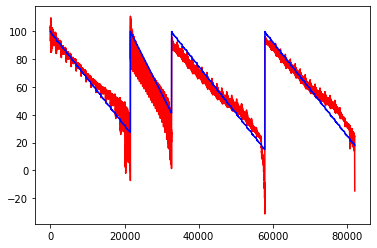

In [ ]:
from_num =None
to_num =None

plt.plot(pred[from_num:to_num],'r')
plt.plot(y_test[from_num:to_num],'b')
plt.show()

In [ ]:
print(mean_absolute_error(pred,y_test))

print(mean_squared_error(pred,y_test))

5.101495180745507
40.94893194690186


In [ ]:
df5UDDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='UDDS')
df5UDDS.insert(5,'temp',5)
sum_current = pd.DataFrame(integrate.cumtrapz(df5UDDS['Current']))
df5UDDS['sum_current']=sum_current
dfN5UDDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='UDDS')
dfN5UDDS.insert(5,'temp',-5)
sum_current = pd.DataFrame(integrate.cumtrapz(dfN5UDDS['Current']))
dfN5UDDS['sum_current']=sum_current
df45UDDS =pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='UDDS')
df45UDDS.insert(5,'temp',45)
sum_current = pd.DataFrame(integrate.cumtrapz(df45UDDS['Current']))
df45UDDS['sum_current']=sum_current
df30UDDS = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='UDDS')
df30UDDS.insert(5,'temp',30)
sum_current = pd.DataFrame(integrate.cumtrapz(df30UDDS['Current']))
df30UDDS['sum_current']=sum_current
glass = pd.concat([df5UDDS,dfN5UDDS,df45UDDS,df30UDDS],axis=0)
print(glass)
#x_test,y_test=glass.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1),glass['SoE']
#glass_min_max=(glass['sum_current'] - glass['sum_current'].min()) / (glass['sum_current'].max() - glass['sum_current'].min())
#glass_min_max
#pred = xgb_r.predict(x_test)
#x_test=poly.fit_transform(x_test)
#pred=regr.predict(x_test)
#test.isnull().sum()
#test = test.astype(float)
#x_test=x_test.astype(float)
#pred=gini.predict(x_test)
#test[''] = test['voltage'].astype(float)


          Time  Current  Voltage    Capacity      Energy  temp         SoC  \
0          1.0      0.0   4.1350    0.000000    0.000000     5  100.000000   
1          2.0    -53.5   4.1238    0.011306    0.046667     5   99.999563   
2          3.0    -57.2   4.1210    0.026861    0.110778     5   99.999096   
3          4.0    -59.5   4.1201    0.043139    0.177889     5   99.998609   
4          5.0    -60.2   4.1189    0.059778    0.246444     5   99.998118   
...        ...      ...      ...         ...         ...   ...         ...   
24257  24258.0   -956.1   2.5607  133.971806  385.549611    30   16.058999   
24258  24259.0   -852.6   2.5579  134.209056  386.157528    30   16.052033   
24259  24260.0   -780.5   2.5582  134.425583  386.711806    30   16.045657   
24260  24261.0   -864.5   2.5365  134.666278  387.323861    30   16.038594   
24261  24262.0  -1223.2   2.4968  134.768167  387.578778    30   16.028600   

              SoE  sum_current  
0      100.000000       -26.75

In [ ]:
model =make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = 0.1, normalize = True, tol = 0.001, \
             solver ='auto', random_state = 42))
model.fit(x_train,y_train)
pred=model.predict(x_test)
#model = Ridge(alpha = 0.5, normalize = True, tol = 0.001, \
   #          solver ='auto', random_state = 42)
#model.fit(x_train,y_train)
#pred=model.predict(x_test)
#mr=BayesianRidge()
#mr.fit(x_train,y_train)
#pred=mr.predict(x_test)
#knn=KNeighborsRegressor(n_neighbors=8)
#knn.fit(x_train,y_train)
#pred=knn.predict(x_test)
#regr = LinearRegression()
#regr.fit(x_train, y_train)
#pred=regr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
y_test =np.array(y_test)
y_test
pred

array([103.0804698 , 103.0804698 , 103.09261781, ..., -11.6134633 ,
       -13.44491119, -14.8378738 ])

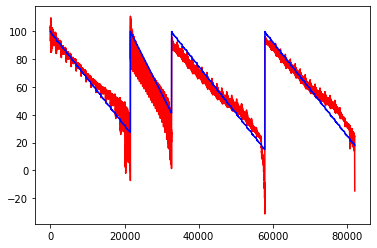

In [ ]:
from_num =None
to_num =None

plt.plot(pred[from_num:to_num],'r')
plt.plot(y_test[from_num:to_num],'b')
plt.show()

In [ ]:
print(mean_absolute_error(pred,y_test))

print(mean_squared_error(pred,y_test))

5.101495180745507
40.94893194690186


In [ ]:
df5US06 = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/5.xlsx',sheet_name='US06')
df5US06.insert(5,'temp',5)
sum_current = pd.DataFrame(integrate.cumtrapz(df5US06['Current']))
df5US06['sum_current']=sum_current
dfN5US06 = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/N5.xlsx',sheet_name='US06')
dfN5US06.insert(5,'temp',-5)
sum_current = pd.DataFrame(integrate.cumtrapz(dfN5US06['Current']))
dfN5US06['sum_current']=sum_current
df45US06 =pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/45.xlsx',sheet_name='US06')
df45US06.insert(5,'temp',45)
sum_current = pd.DataFrame(integrate.cumtrapz(df45US06['Current']))
df45US06['sum_current']=sum_current
df30US06 = pd.read_excel('/content/drive/MyDrive/Prashant_Data-20220617T061411Z-001/Prashant_Data/30.xlsx',sheet_name='US06')
df30US06.insert(5,'temp',30)
sum_current = pd.DataFrame(integrate.cumtrapz(df30US06['Current']))
df30US06['sum_current']=sum_current
light = pd.concat([df5US06,dfN5US06,df45US06,df30US06],axis=0)
light['sum_current']=light['sum_current'].fillna(light['sum_current'].mean())
#test
x_test,y_test=light.drop('SoC',axis=1).drop('Energy',axis=1).drop('Time',axis=1).drop('Capacity',axis=1).drop('SoE',axis=1).drop('sum_current',axis=1),light['SoE']
#light_min_max=(light['sum_current'] - light['sum_current'].min()) / (light['sum_current'].max() - light['sum_current'].min())

#light_min_max
print(x_test)
#pred = xgb_r.predict(x_test)
#x_test=poly.fit_transform(x_test)
#pred=regr.predict(x_test)

#pred=gini.predict(x_test)

       Current  Voltage  temp
0       -411.4   4.0969     5
1       -412.2   4.0590     5
2      -1712.0   3.8523     5
3      -2122.0   3.7896     5
4      -2121.2   3.7822     5
...        ...      ...   ...
15776  -2030.5   2.6500    30
15777  -2200.1   2.5812    30
15778  -2102.6   2.5477    30
15779  -2081.8   2.5195    30
15780  -2361.6   2.4959    30

[63245 rows x 3 columns]


In [ ]:
model =make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = 0.1, normalize = True, tol = 0.001, \
             solver ='auto', random_state = 42))
model.fit(x_train,y_train)
pred=model.predict(x_test,)
#model = Ridge(alpha = 0.5, normalize = True, tol = 0.001, \
 #            solver ='auto', random_state = 42)
#model.fit(x_train,y_train)
#pred=model.predict(x_test)
#mr=BayesianRidge()
#mr.fit(x_train,y_train)
#pred=mr.predict(x_test)
#knn=KNeighborsRegressor(n_neighbors=8)
#knn.fit(x_train,y_train)
#pred=knn.predict(x_test)
#regr = LinearRegression()
#regr.fit(x_train, y_train)
#pred=regr.predict(x_test)
#mr=BayesianRidge()
#mr.fit(x_train,y_train)
#pred=mr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
x_train



,Current,Voltage,temp,sum_current
0,1.3296,4.2373,5,1.330350
1,1.3311,4.3554,5,2.571000
2,1.1502,4.3684,5,3.566450
3,0.8407,4.3328,5,3.981250
4,-0.0111,4.1976,5,3.970150
...,...,...,...,...
19318,-4.0119,2.6057,30,-10025.858600
19319,-4.0119,2.5632,30,-10029.135000
19320,-2.5409,2.6336,30,-10032.406900
19321,-4.0029,2.5424,30,-10036.410200


In [ ]:
x_test

In [ ]:
y_test =np.array(y_test)
y_test
pred

array([ 2742.25354689,  2744.47278612, 11076.17515683, ...,
       13476.1417351 , 13340.38768554, 15135.51137628])

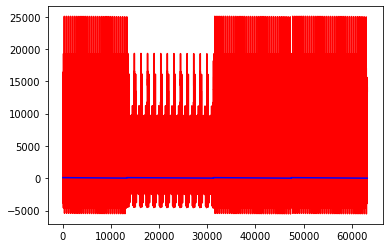

In [ ]:
from_num =None
to_num =None

plt.plot(pred[from_num:to_num],'r')
plt.plot(y_test[from_num:to_num],'b')
plt.show()

In [ ]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))

5304.974321005344
52146507.19596737


In [ ]:
y_test =np.array(y_test)
y_test
pred

array([61.658676, 61.658676, 61.658676, ..., 16.726433, 16.726433,
       16.726433], dtype=float32)

In [ ]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))

20.88681611484128
542.010210950772


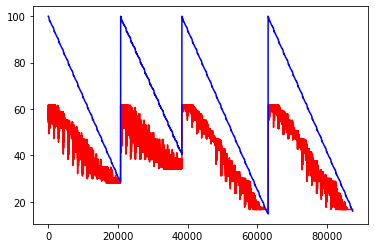

In [ ]:
from_num =None
to_num =None

plt.plot(pred[from_num:to_num],'r')
plt.plot(y_test[from_num:to_num],'b')
plt.show()

In [ ]:
y_test

#plt.plot(train_min_max,'r')
#plt.show()
#plt.plot(test_min_max,'b')
#plt.show()
#plt.plot(power_min_max,'y')
#plt.show()
#plt.plot(light_min_max,'p')
#plt.show()
#plt.plot(glass_min_max,'g')
#plt.show()

0        100.000000
1        100.000000
2        100.000119
3        100.000258
4        100.000397
            ...    
24275      0.148727
24276      0.134635
24277      0.119732
24278      0.103261
24279      0.085818
Name: SoE, Length: 82145, dtype: float64

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5]


187.5